<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Clustering

_Author: Sinan Uozdemir (San Francisco)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Know the difference between supervised and unsupervised learning.
- Format and preprocess data for clustering
- Understand and know how to apply k-means clustering.
- Understand and know how to apply density-based clustering (DBSCAN).
- Define the Silhouette Coefficient and how it relates to clustering.
- Evaluate clusters for fit

### Lesson Guide
- [Supervised vs. Unsupervised Learning](#supervised-vs-unsupervised)
- [Unsupervised Learning](#unsupervised-learning)
    - [How could unsupervised learning or clustering be useful?](#userful-unsupervised-learning)
	- [Unsupervised Learning Example: Coin Clustering](#unsupervised-learning-example-coin-clustering)
	- [Common Types of Unsupervised Learning](#common-types-of-unsupervised-learning)
	- [Using Multiple Types of Learning Together](#using-multiple-types-of-learning-together)
- [Clustering](#clustering)
- [K-Means: Centroid Clustering](#k-means-centroid-clustering)
	- [Visual Demo](#visual-demo)
	- [K-Means Assumptions](#assumptions-are-important-k-means-assumes)
- [K-Means Demo](#k-means-demo)
	- [K-Means Clustering](#k-means-clustering)
	- [Repeat With Scaled Data](#repeat-with-scaled-data)
- [Clustering Metrics](#clustering-metrics)
- [DBSCAN: Density-Based Clustering](#dbscan-density-based-clustering)
	- [Visual Demo](#visual-demo)
- [DBSCAN Clustering Demo](#dbscan-clustering-demo)
- [Hierarchical Clustering](#hierarchical-clustering)
- [Clustering, Classification, and Regression](#clustering-classification-and-regression)
- [Comparing Clustering Algorithms](#comparing-clustering-algorithms)
- [Lesson Summary](#lesson-summary)

<a id="supervised-vs-unsupervised"></a>
What's the difference between supervised and unsupervised learning?
==

**Supervised learning (a.k.a., “predictive modeling”):**
Classification and regression

- Predicts an outcome based on input data.
     - Example: Predicts whether an email is spam or ham.
- Attempts to generalize.
- Requires past data on the element we want to predict (the target).


**Unsupervised learning:**
Clustering and dimensionality reduction

- Extracts structure from data.
    - Example: Segmenting grocery store shoppers into “clusters” that exhibit similar behaviors.
- Attempts to represent.
- Does not require past data on the element we want to predict.

![supervised-vs-unsupervised](assets/supervised-vs-unsupervised.jpg)

<a id="unsupervised-learning"></a>
## Unsupervised Learning
---

Supervised learning focuses on finding a relationship between a matrix of features and a response variable. 

There is typically additional (latent) structure hiding in the feature matrix. For example, some features might be related to each other or even redundant. There also could be groups of observations that seem to be related.

Taking advantage of these latent structures allows us to study data without an explicit response in mind and to find better representations for our data to improve predictive performance.

**Unsupervised learning** is designed to identify these kinds of structural relationships in our data.

> **The primary goal of unsupervised learning is "representation."** Unsupervised learning extracts structure from data. For example, you could segment grocery-store shoppers into "clusters" of shoppers who exhibit similar behaviors.

So far, we have primarily studied supervised algorithms: Each observation (row of data) comes with one or more labels -- either categorical variables (classes) or measurements (regression).

Unsupervised learning has a different goal: feature discovery.

> One common and fundamental example of unsupervised learning is **clustering**. Clustering algorithms are used to find meaningful groups within data.

**Unsupervised learning is clearly differentiated from supervised learning.** With unsupervised learning:

- There's no clear objective.
- There's no "right answer" (which means it's hard to tell how well you're doing).
- There's no response variable — only observations with features.
- Labeled data is not required.

<a id="userful-unsupervised-learning"></a>
# How could unsupervised learning or clustering be useful?

### Helpful uses for clustering: 
   - Find items with similar behavior (users, products, voters, etc)
   - Market segmentation
   - Understand complex systems
   - Discover meaningful categories for your data
   - Reduce the number of classes by grouping (e.g. bourbons, scotches -> whiskeys)
   - Reduce the dimensions of your problem
   - Pre-processing! Create labels for supervised learning

<a id="unsupervised-learning-example-coin-clustering"></a>
### An Example of Unsupervised Learning: Coin Clustering

- Observations: Coins
- Features: Size and mass
- Response: None (no hand-labeling required!)

- Perform unsupervised learning:
  - Cluster the coins based on “similarity.”
  - You’re done!

![](./assets/images/unsupervised-coin.png)

![coin](assets/unsupervised-coin.png)

What would you imagine a plot of US coins to look like? Are these coins likely US coins (pennies, nickels, dimes, and quarters)?

**Answer:** ---

What conclusions could you make about this group of coins?

**Answer:** ---

In [3]:
print(answer_1)

Although slight variations in mass and size may exist, we would expect each of the four denominations to be extremely similar in mass and size. Hence, the plot would have four well-separated clusters with little variance from each centroid. In the plot above, What conclusions could you make about this group of coins?


In [4]:
print(answer_2)


Possible conclusions include:

- The coins have numerous different masses and sizes. Because there are few tight clusters, we might guess these are mostly single copies of coins from many different currencies.

- There are 3-4 clusters each with moderate variance. Perhaps these represent that overall, coins tend to be distinguished by 3-4 groups of masses and sizes. Perhaps this is related to design constraints of coins -- each currency requires 3-4 coins across a particular range of convenient sizes.

- There is a positive correlation between mass and size. Larger coin mass is correlated with larger coin size.

- There are three dense points which are likely the same coin. Perhaps there are a few copies of the same coin. (This assumes all coins of the same type are nearly exactly the same mass and size.)



<a id="common-types-of-unsupervised-learning"></a>
### Common Types of Unsupervised Learning

**Clustering:** Group “similar” data points together.

**Dimensionality Reduction:** Reduce the dimensionality of a data set by extracting features that capture most of the variance in the data.

<a id="using-multiple-types-of-learning-together"></a>
### Using Multiple Types of Learning Together
None of these techniques are mutually exclusive, and they can be used in combination for better results. A useful example is **transfer learning** or **ensemble learning**.

Imagine you have a 100,000-row data set with no response values. Your job is to create a response with hand-labels and then create an algorithm to predict the response using supervised learning. 

Unfortunately, you only have time to label 10,000 rows. Does that mean the rest of the data is useless?

The extra 90,000 rows are very useful! We can first use unsupervised learning to identify hidden structures such as related features and groups that naturally form in our data. The unsupervised learning algorithms can transform both our unlabeled and labeled data into a form that's easier to predict from.

We then use the new transformed data with supervised learning to get the predictions we were looking for.

<a id="clustering"></a>
## Clustering
---

We're going to cover three major clustering approaches:

- **Centroid clustering using k-means:** Looks for the centers of k pre-specified groups.

- **Density-based clustering using DBSCAN:** Looks at gaps, or lack thereof, between datapoints.

- **Hierarchical clustering using agglomerative clustering:** Forms groups of groups of groups in a hierarchy to determine clusters.

#### K-Means Clustering

Similarly to k-nearest neighbors, this partitions the entire space into regions (Voronoi partitions). In k-means clustering, k refers to the number of clusters. Also, since this is unsupervised learning, the regions are determined by the k-means algorithm instead of being provided by the training data.

**Question:** Why might data often appear in centered clusters?

![](./assets/images/clustering-centroids.png)

#### Density-Based Clustering

In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), clusters are created from areas of high density. This can lead to irregularly shaped regions. Also, many parts of space may not belong to any region.

**Question:** Why might data often appear in density-based clusters?

![](./assets/images/density-clusters.png)

#### Hierarchical Clustering

In hierarchical clustering, clusters are composed by joining two smaller clusters together.

Below, we see a tree data structure that stores clusters of points:
- Each node represents a cluster of one or more data points.
- Each leaf represents a single data point.
- The root is the cluster containing all data points.
- Each parent combines its children's clusters to create a new (larger) cluster.

**Question:** When might hierarchical clustering be useful?

![](./assets/images/hierarchical-clustering.png)

**Question:** How is unsupervised learning different from classification?

**Question:** Can you think of real-world clustering applications?

<a id="k-means-centroid-clustering"></a>
## K-Means: Centroid Clustering
---

K-means clustering is a popular centroid-based clustering algorithm.
 
In k-means clustering, we find $k$ clusters (where $k$ is user-specified), each distributed around a single point (called a **centroid**, an imaginary "center point" or the cluster's "center of mass").

> **K-means seeks to minimize the sum of squares of each point about its cluster centroid.**

If we manage to minimize this, then we claim to have found good clusters.

- As a class, try drawing three clusters and data points in which this constraint is met.
- Draw another diagram where the constraint is not met.

---

![clustering-centroids](assets/clustering-centroids.png)

# K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster. 
5. Repeat steps 3-4 until your centroids converge. 

1. Pick a value for k (the number of clusters to create)
==

![](assets/kmeans1.png)

2. Initialize k 'centroids' (starting points) in your data
==

![](assets/kmeans2.png)

3. Assign each point to the nearest centroid. These are your clusters.
==

![](assets/kmeans3.png)

4. Make your clusters better. Move each centroid to the center of its cluster. 
==

![](assets/kmeans4.png)

4. Make your clusters better. Move each centroid to the center of its cluster. 
==

![](assets/kmeans5.png)

5. Repeat steps 3-4 until your centroids converge. 
==

![](assets/kmeans6.png)

5. Repeat steps 3-4 until your centroids converge. 
==

![](assets/kmeans7.png)

5. Repeat steps 3-4 until your centroids converge. 
==

![](assets/kmeans8.png)

5. Repeat steps 3-4 until your centroids converge. 
==

![](assets/kmeans9.png)

5. Repeat steps 3-4 until your centroids converge. 
==

![](assets/kmeans10.png)

### K-means seeks to minimize the sum of squares of each point about its cluster centroid.
 
Let's see step-by-step how we might write an error function that describes this goal. Luckily, we already have experience with sum of squares, so we'll start there. 

> Although the final equation might look complex, you can understand it by thinking about it step-by-step and always relating each step back to the original goal. Do not let any fear of math get in your way!

Keep in mind that unlike a lot of what you do in math, the math we're about to see is not a "law" and it is not "derived" from any equation. It was arrived at only because someone thought the goal metric above would be a useful description of one type of cluster. As we showed earlier, many other definitions of "clusters" are equally valid.

#### Step One: Definitions

Let's step through a few definitions we'll need to formalize the statement. Note that every data point must belong to exactly one cluster.

- $S_i$ is the set of points in the $i$th cluster. For example:
    - $S_1 = \{(1, 1), (2, 1), (0, 1)\}$.
    - $S_2 = \{(10, 10), (12, 10)\}$.


- $x$ is an arbitrary point. For example:
    - $x = (2, 1)$.
    - Note that $x \in S_1$. This reads: "$x$ belongs to $S_1$" or just "$x$ in $S_1$."
    

- $\mu_i$ is the centroid ("center point") of all points in $S_i$. For example:
    - $\mu_1 = (\frac{1+2+0}{3}, \frac{1+1+1}{3}) = (1, 1)$.
    - $\mu_2 = (\frac{10+12}{2}, \frac{10+10}{2}) = (11, 10)$.

#### Step Two: Error of one cluster

We need to measure the "tightness" of each cluster -- the closer its points are to the centroid, the better. So, we'll measure how far away each point is from the centroid. Further, we'll square each distance to particularly penalize far away points.

So, the sum of the distances of each point $x$ to $\mu$ is just:

$$E_i(S) = {\sum_{x \in S} {\|x - \mu\|^2}}$$

> This is read: "The sum of the square distances of each point in S to the centroid of S."

**Question:** How does this relate to the goal statement?

**Answer:** ---

In [17]:
# print(answer_3)

#### Step Three: Sum of all cluster errors

Now, let's find this sum for each cluster. If we sum these sums together, that is the total error for all $k$ clusters:

$$E_{total}(S_1, ..., S_k) = \sum_{i=1}^k E_i(S_i)$$

$$= \sum_{i=1}^k {\sum_{x \in S} {\|x - \mu\|^2}}$$

**Question:** How does this relate to the goal statement?

**Answer:** ---

In [23]:
# print(answer_4)

#### Step Four: Find the clusters that minimize total error

Precisely, find $k$ partitions $S_1, …, S_k$ of the data with centroids $\mu_1, …, \mu_k$ that minimize $E_{total}$. In other words:

$$\text{argmin}_{S_1, …, S_k} \sum_{i=1}^k {\sum_{x \in S_i} {\|x - \mu_i\|^2}}$$

> $\text{argmin}_{S_1, …, S_k}\ f(S_1, ..., S_k)$: Find the values of $S_1, ..., S_k$ that minimize $f(S_1, ..., S_k)$.

This is a computationally difficult problem to solve, so we often rely on heuristics.

The "standard" heuristic is called **Lloyd’s Algorithm**:
1. Start with $k$ initial (random) points* (we'll call these "centroids").
2. Assign each datapoint to a cluster by finding its "closest" centroid (e.g. using Euclidean distance).
3. Calculate new centroids based on the datapoints assigned to each cluster.
4. Repeat 2-4 until clusters do not change.

\* There are a number of techniques for choosing initial points. For example, see the `k-means++` technique.

<a id="visual-demo"></a>
### Visual Demo

[Click through](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) for a demo of k-means clustering in action.

![voronoi](assets/voronoi.png)

<a id="assumptions-are-important-k-means-assumes"></a>
### K-Means Assumptions

K-means assumes:

- k is the correct number of clusters.
- The data is isotropically distributed (circular/spherical distribution).
- The variance is the same for each variable.
- Clusters are roughly the same size.

View these resources to see counterexamples/cases where assumptions are not met:
- [Variance Explained](http://varianceexplained.org/r/kmeans-free-lunch/)
- [Scikit-Learn](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html)

#### How do we choose k?

Finding the correct k to use for k-means clustering is not a simple task.

We do not have a ground-truth we can use, so there isn't necessarily a "correct" number of clusters. However, we can find metrics that try to quantify the quality of our groupings.

Our application is also an important consideration. For example, during customer segmentation we want clusters that are large enough to be targetable by the marketing team. In that case, even if the most natural-looking clusters are small, we may try to group several of them together so that it makes financial sense to target those groups.

**Common approaches include:**
- Figuring out the correct number of clusters from previous experience.
- Using the elbow method to find a number of clusters that no longer seems to improve a clustering metric by a noticeable degree.
  - The silhouette coefficient is a commonly used measure.
  - For an example, check out this [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) documentation on sklearn.
  - If we're using clustering to improve performance on a supervised learning problem, then we can use our usual methods to test predictions.
  
**It's tempting to "tune" k as we have in supervised learning:**
  - If we are working on a supervised learning problem, then this is possible.
  - If we are using clustering to explore our data, then tuning is of little benefit since we do not know precisely what we are looking for.

<a id="k-means-demo"></a>
## K-Means Demo
---

In [5]:
# Beer data set
import pandas as pd
url = 'data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


#### How would you cluster these beers?

In [6]:
# Define X.
X = beer.drop('name', axis=1)
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


#### What happened to Y?

- Y represents the labels in supervised learning. Because clustering is unsupervised, each input point has no target label. So, there is no Y needed for k-means.

<a id="k-means-clustering"></a>
### K-Means Clustering

#### K-means with three clusters

In [7]:
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans

## Instantiate
km = KMeans(n_clusters=3, random_state=1)

## Where is test train split??

## Fit
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Review the cluster labels.

In [8]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1],
      dtype=int32)

#### Save the cluster labels and sort by cluster.

In [10]:
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


#### What do the clusters seem to be based on? Why?

#### Review the cluster centers.

In [11]:
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.44      ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

#### Calculate the mean of each feature for each cluster.

beer.groupby('cluster').mean()

#### Save the `DataFrame` of cluster centers.

In [12]:
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


#### Allow plots to appear in the notebook.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

#### Create a "colors" array for plotting.

In [14]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue).

Text(0, 0.5, 'alcohol')

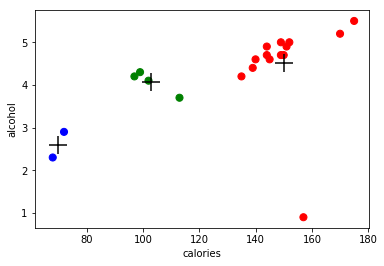

In [15]:
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('calories')
plt.ylabel('alcohol')

#### Scatter plot matrix (0=red, 1=green, 2=blue).

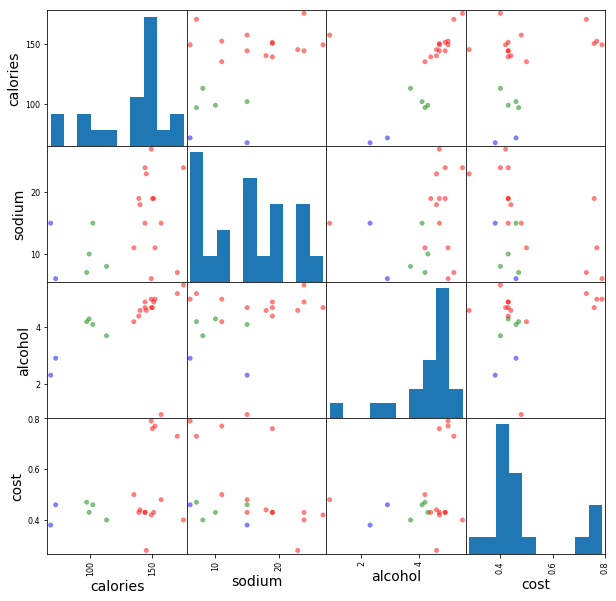

In [25]:
scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

<a id="repeat-with-scaled-data"></a>
### Repeat With Scaled Data

Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features.

Remember that k-means is looking for isotropic groups, meaning that they disperse from the center in all directions evenly. 

There is more than one choice of scaling method (min/max, z-score, log, etc.), but the best choice is the one that makes your clusters isotropic.

#### Center and scale the data.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### K-means with three clusters on scaled data.

In [17]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [18]:
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

#### Save the cluster labels and sort by cluster.

In [22]:
beer['cluster'] = km.labels_
beer['bb'] = beer['alcohol'] / beer['cost']
beer.sort_values('bb')

,name,calories,sodium,alcohol,cost,cluster,bb
2,Lowenbrau,157,15,0.9,0.48,1,1.875000
15,Pabst_Extra_Light,68,15,2.3,0.38,1,6.052632
13,Becks,150,19,4.7,0.76,2,6.184211
18,Olympia_Goled_Light,72,6,2.9,0.46,1,6.304348
14,Kirin,149,6,5.0,0.79,2,6.329114
4,Heineken,152,11,5.0,0.77,2,6.493506
3,Kronenbourg,170,7,5.2,0.73,2,7.123288
12,Michelob_Light,135,11,4.2,0.50,1,8.400000
11,Coors_Light,102,15,4.1,0.46,1,8.913043
19,Schlitz_Light,97,7,4.2,0.47,1,8.936170


#### What are the "characteristics" of each cluster?

**Answer: One possible interpretation:**

- Cluster 0: Regular beers
- Cluster 1: Light beers (lower calorie, lower alcohol)
- Cluster 2: Expensive (high cost)

#### Review the cluster centers.

In [23]:
cneters = beer.groupby('cluster').mean()
cneters

,calories,sodium,alcohol,cost,bb
cluster,,,,,
0,148.375,21.125,4.7875,0.4075,11.972135
1,105.375,10.875,3.3250,0.4475,7.466399
2,155.250,10.750,4.9750,0.7625,6.532530


Text(0, 0.5, 'alcohol')

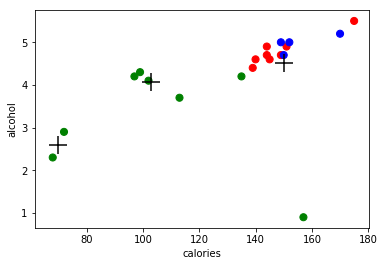

In [24]:
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50);

# Cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black');

# Add labels.
plt.xlabel('calories')
plt.ylabel('alcohol')

#### Scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue).

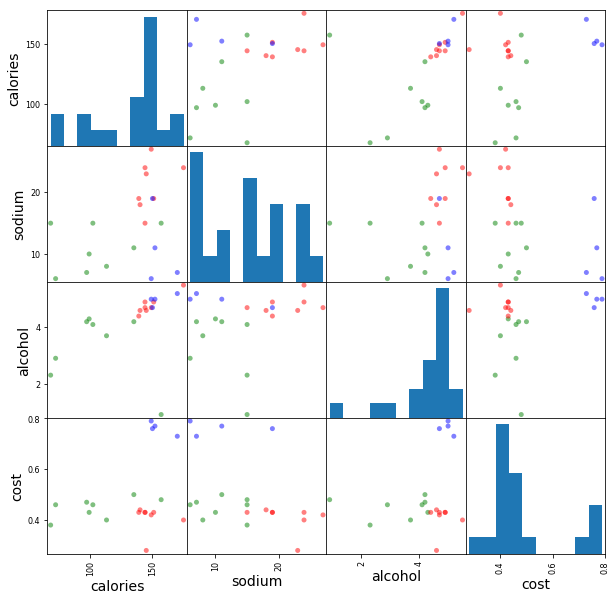

In [32]:
scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

#### Do you notice any cluster assignments that seem a bit odd? How might we explain those?

In [34]:
# print(answer_5)

<a id="clustering-metrics"></a>
Metrics for assessing your clusters
==
---

As usual, we need a metric to evaluate model fit.
 
For clustering, we can us a **Inertia** or a **Silhouette Score**. There are many other approaches, but these are a good place to start. Keep in mind that "good fit" for clustering is often arbitrary. For example, scoring isometry might not apply if most clusters are naturally arbitrary shapes. 

- **Inertia**
- **Silhouette Score**


Practice using with iris data set

In [25]:
from sklearn import cluster, datasets, preprocessing, metrics

# Check out the dataset and our target values
df = pd.read_csv("data/iris.csv")
cols = df.columns[:-1]
print(df['Name'].value_counts())
df.head(5)

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Inertia
==

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:


![inertia](assets/inertia.png)

Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

- Inertia makes the assumption that clusters are convex and isotropic (not varying in magnitude according to the direction of measurement), which is not always the case. 
    - It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: 
    - We just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). 
    - Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.
    
**High Level Summary of Inertia:**
- Sum of squared errors for each cluster
- Ranges from 0 to very high values
- Low inertia = dense clusters

In [26]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [28]:
print(centroids)

[[0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]]


In [29]:
print(inertia)

6.998114004826761


In [30]:
for k in range(2, 6):
    X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    
    print("""
    When k={} the inertia is:{}
    """.format(k, inertia))


    When k=2 the inertia is:12.14368828157972
    

    When k=3 the inertia is:6.998114004826761
    

    When k=4 the inertia is:5.532831003081898
    

    When k=5 the inertia is:4.571211374951953
    


Silhouette Score
==


The Silhouette Coefficient gives a score for each sample individually. At a high level, it compares the point's cohesion to its cluster against its separation from the nearest other cluster. Ideally, you want the point to be very nearby other points in its own cluster and very far points in the nearest other cluster.

Here is how the Silhouette Coefficient is measured. Keep in mind how this math definition compares to our high-level idea of a sample's cohesion vs. separation:

$$\frac {b - a} {max(a,b)}$$

- $a$ is the mean distance between a sample and all other points in the cluster.

- $b$ is the mean distance between a sample and all other points in the nearest cluster.

The coefficient ranges between 1 and -1. The larger the coefficient, the better the clustering.

To get a score for all clusters rather than for a particular point, we average over all points to judge the cluster algorithm.

The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN


**Using Sklearn**
This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

**High Level Summary of Silhouette Score:**
- Measure of how far apart clusters are
- Ranges from -1 to 1
- High silhouette Score = clusters are well separated

In [31]:
for k in range(2, 6):
    X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    score = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    
    print("""
    When k={} the silhousette score is:{}
    """.format(k, score))


    When k=2 the silhousette score is:0.6294675561906644
    

    When k=3 the silhousette score is:0.5043188549150883
    

    When k=4 the silhousette score is:0.44462733006506816
    

    When k=5 the silhousette score is:0.35268997896773463
    


<a id="dbscan-density-based-clustering"></a>
## DBSCAN: Density-Based Clustering
---

![](./assets/images/dbscan.png)

**DBSCAN: Density-Based Spatial Clustering of Applications With Noise (1996)**

The main idea of DBSCAN is to group together closely packed points by identifying:
- Core points
- Reachable points
- Outliers (not reachable)

**Its two parameters are:**
- `min_samples`: At least this many points are required inside a neighborhood to form a dense cluster.
- `eps`: epsilon. This is the radius of a neighborhood.

**How does it work?** 

1. Choose a random unvisited data point.
2. Find all points in its neighborhood (i.e. at most `eps` units away). Then:
    - **If there are at least `min_samples` points in its neighborhood:** Add all points in the neighborhood to the current cluster. Mark them as unvisited if they have not been visited.
    - **Otherwise:** Mark the current point as visited. If the point is not part of a cluster, label the point as noise and go to Step 1.
3. If another point in the current cluster is unvisited, choose another point in the cluster and go to Step 2. Otherwise, start a new cluster and go to Step 1.


## Example of finding clusters
![dbscan](assets/dbscan.png)

## Example of found clusters
![density-clusters](assets/density-clusters.png)

<a id="visual-demo"></a>
### Visual Demo

[Click through](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) for a demo of DBSCAN in action.

**DBSCAN advantages**:
- Can find arbitrarily shaped clusters.
- Don’t have to specify number of clusters.
- Excludes outliers automatically.

**DBSCAN disadvantages**:
- Doesn’t work well when clusters are of varying densities.
- Hard to choose parameters that work for all clusters.
- Can be hard to choose correct parameters.

#### How does DBSCAN differ from k-means?

In [44]:
# print(answer_6)

<a id="dbscan-clustering-demo"></a>
## DBSCAN Clustering Demo
---

#### DBSCAN with eps=1 and min_samples=3.

Default is `eps=0.5`, `min_samples=5`


---
**Parameters:**

```
eps : float, optional
The maximum distance between two samples for them to be considered as in the same neighborhood.

min_samples : int, optional
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
```

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
url = './data/beer.txt'
beer = pd.read_csv(url, sep=' ')
X = beer.drop('name', axis=1)

In [41]:
## Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Instantiate
db = DBSCAN(eps=1, min_samples=2)

## Fit
db.fit(X_scaled)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

#### Review the cluster labels.

In [39]:
db.labels_

array([ 0,  0, -1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0])

#### Save the cluster labels and sort by cluster.

In [42]:
beer['cluster'] = db.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
2,Lowenbrau,157,15,0.9,0.48,-1
5,Old_Milwaukee,145,23,4.6,0.28,-1
6,Augsberger,175,24,5.5,0.40,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,-1
13,Becks,150,19,4.7,0.76,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,-1
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


#### Review the cluster centers.

In [43]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
-1,127.833333,17.0,3.483333,0.460000
0,143.142857,19.0,4.628571,0.440000
1,157.000000,8.0,5.066667,0.763333
2,102.750000,10.0,4.075000,0.440000


#### Scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow).

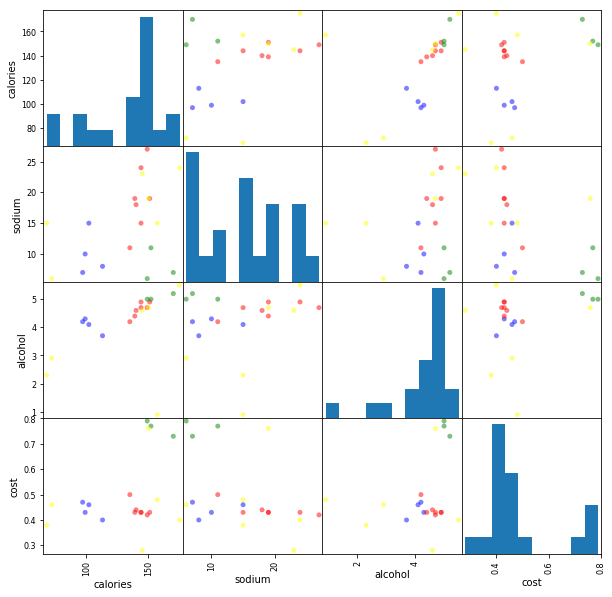

In [44]:
scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100);

<a id="hierarchical-clustering"></a>
## Hierarchical Clustering
---

Hierarchical clustering, like k-means clustering, is another common form of clustering analysis. With this type of clustering we seek to do exactly what the name suggests:

- Build hierarchies of clusters.
- Connect the clusters in the hierarchy with links.

Once the links are determined, we can display them in what is called a dendrogram — a graph that displays all of these links in their hierarchical structure.

## Example 1

![hierarchical-clustering](assets/hierarchical-clustering.png)

## Example 2

![hierarchical-clustering-diagram](assets/hierarchical-clustering-diagram.png)

**As we described earlier:**

- Each node represents a cluster of one or more data points.
- Each leaf represents a single data point.
- The root is the cluster containing all data points.
- Each parent combines its children's clusters to create a new (larger) cluster.

**A simple algorithm we could use to generate this tree:**

1. Create a cluster for each point, containing only that point. (Create all leaf nodes.)
2. Choose the two clusters with centroids closest to each other.
    - Combine the two clusters into a new cluster that replaces the two individual clusters. (Create a new parent node.)
3. Repeat Step 2 until only one cluster remains.

Essentially we form groups of groups of groups.

![](assets/hierarchical-clustering.png)

**Example Sklearn**

Use Sklearn's AgglomerativeClustering for Hierarchical clustering.

**Parameters:**
```
The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- **Maximum** or **complete linkage** minimizes the maximum distance between observations of pairs of clusters.
- **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.
- **Single linkage** minimizes the distance between the closest observations of pairs of clusters.

AgglomerativeClustering can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.
```

In [45]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [46]:
# Check out the dataset and our target values
df = pd.read_csv("data/iris.csv")
cols = df.columns[:-1]
print(df['Name'].value_counts())
df.head(5)

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
X = df[cols]

## Scale data
scaler = StandardScaler()
X_scaled = preprocessing.MinMaxScaler().fit_transform(X)

## Instantiate
agg = AgglomerativeClustering(n_clusters=3)

## Fit
agg.fit(X_scaled)

## Get the labels
labels = agg.labels_

# Save the cluster labels and sort by cluster.
df['cluster'] = agg.labels_
df.sort_values('cluster').head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,cluster
74,6.4,2.9,4.3,1.3,Iris-versicolor,0
85,6.0,3.4,4.5,1.6,Iris-versicolor,0
84,5.4,3.0,4.5,1.5,Iris-versicolor,0
83,6.0,2.7,5.1,1.6,Iris-versicolor,0
82,5.8,2.7,3.9,1.2,Iris-versicolor,0


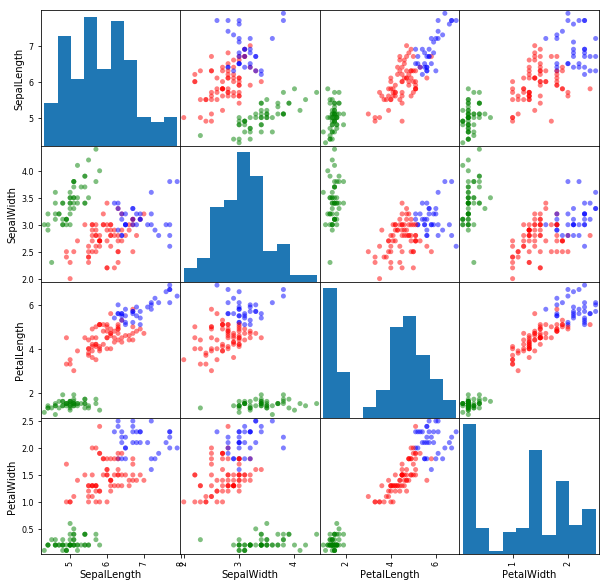

In [48]:
# Scatter plot matrix of hierarchical cluster assignments
scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100);

**Example Scipy**

- Use Scipy's hierarchy for Hierarchical clustering.


**Parameters:**

```
y : ndarray
A condensed distance matrix. A condensed distance matrix is a flat array containing the upper triangular of the distance matrix. This is the form that pdist returns. Alternatively, a collection of  observation vectors in  dimensions may be passed as an  by  array. All elements of the condensed distance matrix must be finite, i.e. no NaNs or infs.

method : str, optional
The linkage algorithm to use. See the Linkage Methods section below for full descriptions.

metric : str or function, optional
The distance metric to use in the case that y is a collection of observation vectors; ignored otherwise. See the pdist function for a list of valid distance metrics. A custom distance function can also be used.

optimal_ordering : bool, optional
If True, the linkage matrix will be reordered so that the distance between successive leaves is minimal. This results in a more intuitive tree structure when the data are visualized. defaults to False, because this algorithm can be slow, particularly on large datasets [2]. See also the optimal_leaf_ordering function.
```


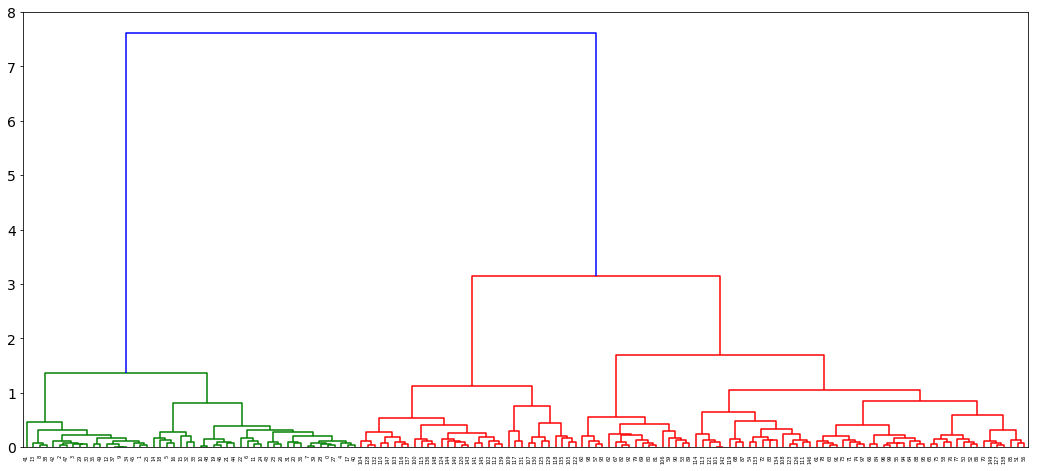

In [58]:
## found from https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

df = pd.read_csv("data/iris.csv")
cols = df.columns[:-1]

## Collect features
X = df[cols]

## Scale fatures
scaler = StandardScaler()
X_scaled = preprocessing.MinMaxScaler().fit_transform(X)

## Fit and get labels
Z = hierarchy.linkage(X_scaled, 'ward')

plt.figure(figsize=(18,8))
dn = hierarchy.dendrogram(Z)

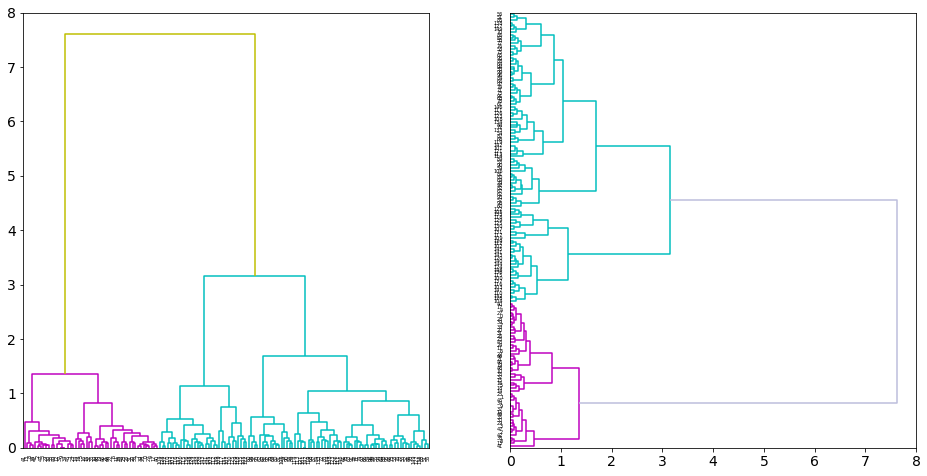

In [59]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',
                           orientation='top')
dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()



<a id="clustering-classification-and-regression"></a>
## Clustering, Classification, and Regression
---

We can use clustering to discover new features, then use those features for either classification or regression.

For classification, we could use clusters directly to classify new points.

For regression, we could use a dummy variable for the clusters as a variable in our regression.

In [49]:
%matplotlib inline


import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal

#### Create a function to plot the data.

In [50]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

#### Create some synthetic data.

In [51]:
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])

for i in range(5):
    print(list(dist.rvs()))

[0.45581253045524067, 0.5412899709792511]
[0.7218860176105217, 0.7865882778977199]
[0.11717991818092041, 0.4104584744087805]
[0.5634686512349312, 1.207395487101977]
[-1.1430267612093303, 0.04593022013003811]


/usr/local/lib/python3.7/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


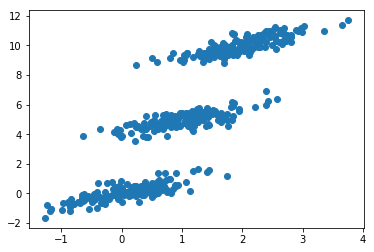

In [52]:
## Create fake data
data = []

## Group 1
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())
    
## Group 2
dist = multivariate_normal(mean=[1, 5], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())
    
## Group 3
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())

    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

#### Find clusters.

In [88]:
df.head()

,x,y
0,1.294323,1.667458
1,0.599728,-0.006074
2,-0.328030,-1.050710
3,1.139214,0.323568
4,-0.278329,0.231684


In [53]:
# Fit a DBSCAN estimator.
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute.
labels = estimator.labels_

labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

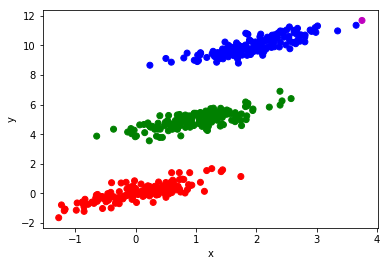

In [54]:
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Add cluster labels back to the `DataFrame`.

In [55]:
# Note that -1 clusters are outliers.
df["cluster"] = labels
df = pd.concat([df, pd.get_dummies(df['cluster'], prefix="cluster")], axis=1)
df.tail()

,x,y,cluster,cluster_-1,cluster_0,cluster_1,cluster_2
445,2.168147,10.365862,2,0,0,0,1
446,1.446261,9.093452,2,0,0,0,1
447,1.702125,9.398586,2,0,0,0,1
448,2.245278,10.258138,2,0,0,0,1
449,2.068296,10.227771,2,0,0,0,1


#### Fit a linear model with clusters included.

In [56]:
## Instantiate
model = LinearRegression()
X = df[["x", "cluster_0", "cluster_1", "cluster_2"]]
y = df['y']

## Fit LR model
model.fit(X, y)

print((model.score(X, y)))

0.9925136058064429


#### Plot the model.

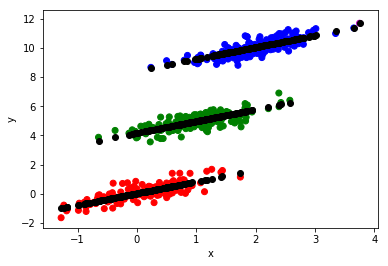

In [57]:
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()

#### What happens if we don't include the clusters we estimated?

0.7373161685261425


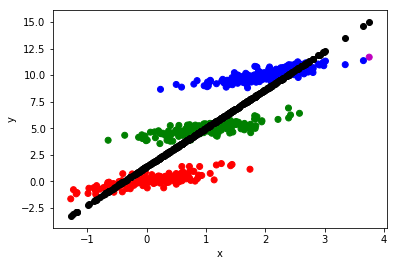

In [58]:
model = LinearRegression()
X = df[["x"]]
y = df['y']
model.fit(X, y)
print((model.score(X, y)))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()

Lab: kmeans_clustering-lab
==


<a id="comparing-clustering-algorithms"></a>
## Comparing Clustering Algorithms

- K-means
  - Finds cluster centers.
  - Must choose the number of clusters.
  - Assumes clusters are isotropic (not varying in magnitude according to the direction of measurement).
- DBSCAN
  - Inspects local density to find clusters.
  - Better than k-means for anisotropic clusters.
  - Capable of finding outliers.
- Hierarchical clustering
  - Finds clusters by forming groups of groups of groups of points.
  - Hierarchical clustering works well for non-spherical clusters.
  - May be computationally expensive.
  - Guaranteed to converge to the same solution (no random initialization).

<a id="lesson-summary"></a>
## Lesson Summary

- Supervised learning vs. unsupervised learning
    - The main difference between the two is whether we use response labels.
- K-means, DBSCAN, and hierarchical clustering
- Inertia and Silhouette Score
- Using clustering along with supervised learning

Answers

In [2]:
answer_1 = "Although slight variations in mass and size may exist, we would expect each of the four denominations to be extremely similar in mass and size. Hence, the plot would have four well-separated clusters with little variance from each centroid. In the plot above, What conclusions could you make about this group of coins?"
answer_2 = """
Possible conclusions include:

- The coins have numerous different masses and sizes. Because there are few tight clusters, we might guess these are mostly single copies of coins from many different currencies.

- There are 3-4 clusters each with moderate variance. Perhaps these represent that overall, coins tend to be distinguished by 3-4 groups of masses and sizes. Perhaps this is related to design constraints of coins -- each currency requires 3-4 coins across a particular range of convenient sizes.

- There is a positive correlation between mass and size. Larger coin mass is correlated with larger coin size.

- There are three dense points which are likely the same coin. Perhaps there are a few copies of the same coin. (This assumes all coins of the same type are nearly exactly the same mass and size.)
"""
answer_3 = """
To accomplish the goal, we must sum the square distance from each point. We could possibly loop directly through each point. However, it is cleaner mathematically to loop through each cluster first, then within each cluster loop through its points. Since every point belongs to a cluster, this method will sum every point's distance!
"""
answer_4 = """
To accomplish the goal, we must sum the square distance from each point. We could possibly loop directly through each point. However, it is cleaner mathematically to loop through each cluster first, then within each cluster loop through its points. Since every point belongs to a cluster, this method will sum every point's distance!
"""
answer_5 = """
It appears that sodium is not often useful in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type (indeed, the sodium is quite low compared to most foods).
"""
answer_6 = """
For example:

- DBSCAN can find arbitrarily shaped clusters, whereas k-means only finds isotropic clusters (i.e. circular/spherical about centroids)
- DBSCAN does not partition the entire space into classes. It also does not label every point as part of a cluster.
- DBSCAN does not create a fixed number of clusters. Instead, it finds clusters based on density (a neighborhood radius and minimum number of samples within it).
"""

